## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
%pip install optree
%pip install keras tensorflow
%pip install matplotlib seaborn sckit-learn dmba xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 15.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   - -------------------------------------- 9.7/332.0 MB 50.6 MB/s eta 0:00:07
   -- ------------------------------------- 18.4/332.0 MB 45.5 MB/s eta 0:00:07
   --- ------------------------------------ 29.1/332.0 MB 47.7 MB/s eta 0:00:07
   ---- ----------------------------------- 40.1/332.0 MB 49.0 MB/s eta 0:00:06
   ------ --------------------------------- 52.2/332.0 MB 50.9 MB/s eta 0:00:06
   ------- -------------------------------- 62.4/332.0 MB 50.8 MB/s eta 0:00:06
   -------- ------------------------------- 72.1/332.0 MB 49.5 MB/s eta 0:00:06
   --------- ------------------------------ 77.9/332.0 MB 46.9 MB/s eta 0:00:06
   --------- ------------------------------ 79.7/332.0 MB 42.3 MB/s eta 0:00:06
   ---------- ----------------------------- 88.6/332.0 MB 42.5 M


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sckit-learn


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Masking

## Loading the dataset

In [4]:
import os

def get_dataset_file_path(file_name):
    # Get current working directory
    cwd = os.getcwd()

    # Construct relative path to the dataset
    relative_path = os.path.join(cwd, "..", "datasets", file_name)

    # Convert to absolute path
    absolute_path = os.path.abspath(relative_path)

    return absolute_path

# Example usage
file_name = "Book3.csv"
get_dataset_file_path(file_name)

'c:\\Users\\visha\\OneDrive\\Documents\\ML-Project\\Electricity_Load_n_Price_Forecasting\\datasets\\Book3.csv'

In [5]:

file_name = "Book3.csv"
file_path = get_dataset_file_path(file_name)
data = pd.read_csv(file_path)
display(data.head())

,Date,Hour,DryBulb,DewPnt,SYSLoad,NumDate
0,2004-01-01 00:00:00.0,1,37,25,12230,732000.0
1,2004-01-01 00:00:00.0,2,37,25,11534,732000.0
2,2004-01-01 00:00:00.0,3,39,24,11038,732000.0
3,2004-01-01 00:00:00.0,4,38,22,10777,732000.0
4,2004-01-01 00:00:00.0,5,37,20,10764,732000.0


In [6]:
file_name = "Holidays.xls"
file_path = get_dataset_file_path(file_name)
hdata = pd.read_excel(file_path)
display(hdata.head())

,Date,Holiday
0,2004-01-01,New Year's Day
1,2004-01-19,Martin Luther King Day
2,2004-02-16,President's Day
3,2004-05-31,Memorial Day
4,2004-07-05,Independence Day


## Data Preprocessing

In [0]:
holidays=hdata.Date
holidays.head()

0   2004-01-01
1   2004-01-19
2   2004-02-16
3   2004-05-31
4   2004-07-05
Name: Date, dtype: datetime64[ns]

In [0]:
#Convert dates to datetime data type
data['Date']=pd.to_datetime(data['Date'])
data.dtypes


Date       datetime64[ns]
Hour                int64
DryBulb             int64
DewPnt              int64
SYSLoad             int64
NumDate           float64
dtype: object

In [0]:
#get the day of the week for each date in the data
dayofweek=data.Date.dt.weekday
dayofweek.head()

0    3
1    3
2    3
3    3
4    3
Name: Date, dtype: int64

In [0]:
isworkday = np.in1d(dayofweek,[0,1,2,3,4]) & ~np.in1d(data['Date'],holidays)
isworkday[22]

False

In [0]:
prevdaysamehour=np.hstack(((np.ones(24)*-1),(data['SYSLoad'][0:-24])))
prevdaysamehour[0]

-1.0

In [0]:
prevweeksamehour=np.hstack(((np.ones(168)*-1),(data['SYSLoad'][0:-168])))
prevweeksamehour.shape

(52608,)

In [0]:
import scipy
import scipy.signal
#By using the lfilter method get the previous 24 hour averrage temperature
prev24houravg = scipy.signal.lfilter(np.ones(24) / 24, 1, data['SYSLoad'])
prev24houravg.shape

(52608,)

In [0]:
#Put all the input data together into a single matrix
X = np.vstack((data['DryBulb'],data['DewPnt'],data['Hour'],dayofweek))
X.shape
display(pd.DataFrame(X.T).head(5))

0,1,2,3
37,25,1,3
37,25,2,3
39,24,3,3
38,22,4,3
37,20,5,3


In [0]:
#Put all the input data together into a single matrix
X = np.vstack((data['DryBulb'],data['DewPnt'],data['Hour'],dayofweek,isworkday,prevweeksamehour,prevdaysamehour,prev24houravg))
X.shape
display(pd.DataFrame(X.T).head(5))

0,1,2,3,4,5,6,7
37.0,25.0,1.0,3.0,0.0,-1.0,-1.0,509.5833333333333
37.0,25.0,2.0,3.0,0.0,-1.0,-1.0,990.1666666666666
39.0,24.0,3.0,3.0,0.0,-1.0,-1.0,1450.0833333333333
38.0,22.0,4.0,3.0,0.0,-1.0,-1.0,1899.125
37.0,20.0,5.0,3.0,0.0,-1.0,-1.0,2347.625


In [0]:
X=np.transpose(X)
X.shape

(52608, 8)

In [0]:
numcols=X.shape[1]


In [0]:
#Take out the first 168 indexes because they have null values
X=X[168:,:]
data=data[168:]
print(X.shape)
print(data.shape)

(52440, 8)
(52440, 6)


In [0]:
#Find the training index that will be used to split the data into train and test
trainInd = data.Date < dt.datetime(2008, 1, 1)
trainX = X[trainInd,:]
trainX.shape

(34896, 8)

In [0]:
#assign the training outputs
trainY=data.SYSLoad[trainInd]
trainY=trainY.to_numpy()
trainY = trainY.reshape((trainY.shape[0], 1))
trainY.shape

(34896, 1)

In [0]:
#split the range for the validation data
validX=X[34896:43680]
validX.shape
validX[-1]

array([ 8.0000000e+00, -5.0000000e+00,  2.4000000e+01,  2.0000000e+00,
        1.0000000e+00,  1.3253000e+04,  1.3827000e+04,  1.6115375e+04])

In [0]:
validY=data.SYSLoad[34896:43680]
validY=validY.to_numpy()
validY = validY.reshape((validY.shape[0], 1))
validY[-1]

array([15438])

In [0]:
testInd = data.Date>= dt.datetime(2009, 1, 1)
testX=X[testInd,:]
print(testX)

[[ 7.00000000e+00 -6.00000000e+00  1.00000000e+00 ...  1.21240000e+04
   1.28040000e+04  1.61936250e+04]
 [ 6.00000000e+00 -7.00000000e+00  2.00000000e+00 ...  1.13450000e+04
   1.21980000e+04  1.62724583e+04]
 [ 6.00000000e+00 -8.00000000e+00  3.00000000e+00 ...  1.08240000e+04
   1.19230000e+04  1.63455417e+04]
 ...
 [ 2.70000000e+01  2.50000000e+01  2.20000000e+01 ...  1.54490000e+04
   1.73440000e+04  1.58159167e+04]
 [ 2.70000000e+01  2.40000000e+01  2.30000000e+01 ...  1.47590000e+04
   1.59130000e+04  1.57670000e+04]
 [ 2.70000000e+01  2.40000000e+01  2.40000000e+01 ...  1.38030000e+04
   1.44660000e+04  1.57456250e+04]]


In [0]:
testY=data.SYSLoad[testInd]
testY=testY.to_numpy()
testY = testY.reshape((testY.shape[0], 1))

In [0]:
from keras.optimizers import SGD

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model2 = Sequential()
model2.add(Dense(256, input_dim=trainX.shape[1], activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model2.add(Dense(1, activation='linear'))

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model2.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])

/databricks/python/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [0]:
import time
start_time = time.time()

In [0]:
history = model2.fit(trainX, trainY, batch_size=100, epochs=300, verbose=2)
elapsed_time = time.time() - start_time

Epoch 1/300
349/349 - 4s - 10ms/step - loss: 223831280.0000 - mae: 14672.2637
Epoch 2/300
349/349 - 1s - 4ms/step - loss: 90242296.0000 - mae: 8811.4463
Epoch 3/300
349/349 - 2s - 4ms/step - loss: 11589597.0000 - mae: 2471.5188
Epoch 4/300
349/349 - 2s - 6ms/step - loss: 8383139.0000 - mae: 2043.0101
Epoch 5/300
349/349 - 1s - 4ms/step - loss: 7098736.0000 - mae: 1877.2208
Epoch 6/300
349/349 - 2s - 4ms/step - loss: 6336833.0000 - mae: 1790.1591
Epoch 7/300
349/349 - 1s - 3ms/step - loss: 5392611.5000 - mae: 1696.3651
Epoch 8/300
349/349 - 1s - 3ms/step - loss: 4422735.0000 - mae: 1569.1990
Epoch 9/300
349/349 - 1s - 4ms/step - loss: 3587831.2500 - mae: 1456.0585
Epoch 10/300
349/349 - 1s - 4ms/step - loss: 2743005.7500 - mae: 1286.5896
Epoch 11/300
349/349 - 1s - 3ms/step - loss: 2368459.2500 - mae: 1195.9076
Epoch 12/300
349/349 - 1s - 3ms/step - loss: 2186592.0000 - mae: 1148.6544
Epoch 13/300
349/349 - 1s - 3ms/step - loss: 2109594.2500 - mae: 1126.0491
Epoch 14/300
349/349 - 1s - 

In [0]:

history=model2.fit(trainX, trainY, batch_size=150, epochs=500,verbose=1)
time.time() - start_time

Epoch 1/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1068700.6250 - mae: 794.1422
Epoch 2/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1048767.1250 - mae: 788.6495
Epoch 3/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1035612.4375 - mae: 784.1404
Epoch 4/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1049954.6250 - mae: 786.7098
Epoch 5/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1036905.6875 - mae: 781.5628
Epoch 6/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1046420.2500 - mae: 788.8990
Epoch 7/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1024565.3750 - mae: 779.2377
Epoch 8/500
161/233 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1021310.7500 - mae: 777.0248

*** WARNING: max output size exceeded, skipping output. ***

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 748370.0625 - mae: 656.8766
Epoch 494/500
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 733566.8750 - mae: 648.7679
Epoch 495/500

844.0073442459106

In [0]:
predictions= model2.predict(validX,verbose=2)
error=validY-predictions
#calculate mean absolute error for validation set
mae=np.mean(np.absolute(error))
mae

275/275 - 0s - 2ms/step


108371.71498427539

In [0]:
#calculate mean absolute percent error for validation set
errorpercent=np.absolute(error)/validY
mape=np.mean(errorpercent)*100
print(mape)

707.6029481085533


In [0]:
testpredictions= model2.predict(testX,verbose=2)
#calculate means absolute error for test set
error=testY-testpredictions
mae=np.mean(np.absolute(error))
mae

274/274 - 0s - 1ms/step


614.6910530821917

In [0]:
#calulcate mean absolute percent error for test set
errorpercent=np.absolute(error)/testY
mape=np.mean(errorpercent)*100
print(mape)

4.119435682636683


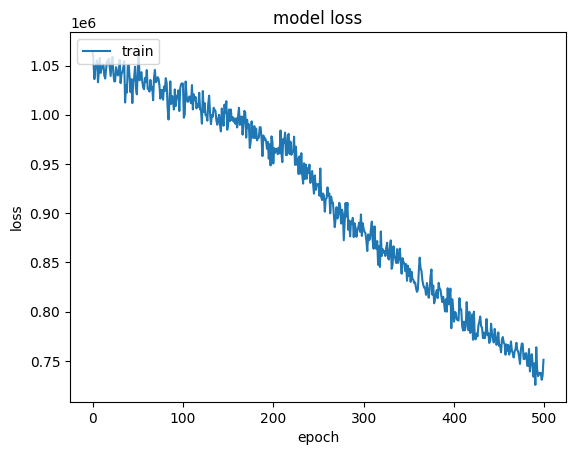

In [0]:
import matplotlib.pyplot as plt
#plot the mean absolute percent error as a function of the number of epochs
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
accuracy = 100 - mape
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 95.88%


In [0]:
import matplotlib.pyplot as plt

# Check the columns in the DataFrame
print(data.columns)

# Ensure 'time' column exists
if 'Time' in data.columns and 'actual' in data.columns and 'predicted' in data.columns:
    plt.figure(figsize=(12,6))
    plt.plot(data['Time'], data['actual'], label='Actual Output')
    plt.plot(data['Time'], data['predicted'], label='Predicted Output', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Output')
    plt.title('Actual vs Predicted Output Over Time')
    plt.legend()
    plt.show()
else:
    print("One or more required columns are missing in the DataFrame.")

Index(['Date', 'Hour', 'DryBulb', 'DewPnt', 'SYSLoad', 'NumDate'], dtype='object')
One or more required columns are missing in the DataFrame.
